In [1]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import deque
from matplotlib.pyplot import figure
from pandas_profiling import ProfileReport
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/jrudk/OneDrive/Pulpit/Social_Network_Ads.csv", sep=";")

In [3]:
for x in df.index:
    if df.loc[x,"Gender"] == "Male":
        df.loc[x,"G_bin"] = 1
    elif df.loc[x,"Gender"] == "Female":
        df.loc[x,"G_bin"] = 0

In [4]:
df

,Gender,Age,EstimatedSalary,Purchased,G_bin
0,Male,19,19000,0,1.0
1,Male,35,20000,0,1.0
2,Female,26,43000,0,0.0
3,Female,27,57000,0,0.0
4,Male,19,76000,0,1.0
...,...,...,...,...,...
395,Female,46,41000,1,0.0
396,Male,51,23000,1,1.0
397,Female,50,20000,1,0.0
398,Male,36,33000,0,1.0


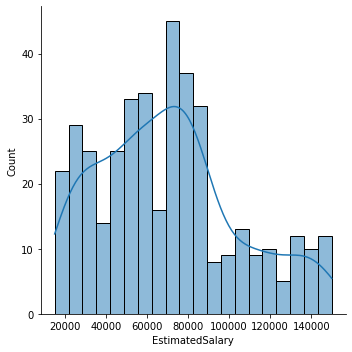

In [4]:
sns.displot(df['EstimatedSalary'], kde = True, bins = 20) 

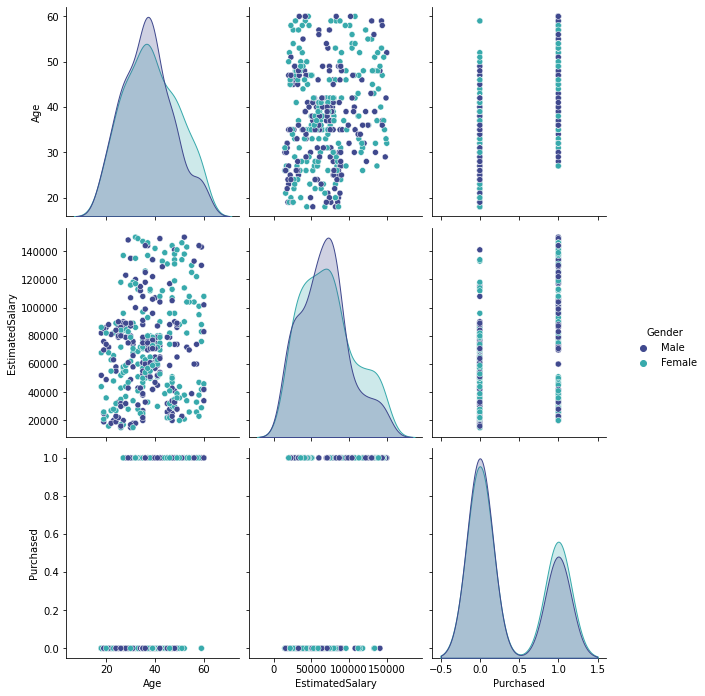

In [5]:
g = sns.pairplot(df, hue = "Gender", palette = "mako")
g.fig.set_size_inches(10,10)

<AxesSubplot:xlabel='Gender', ylabel='Purchased'>

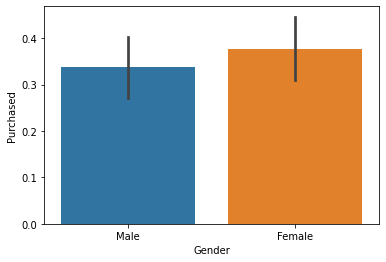

In [6]:
sns.barplot(x = "Gender", y = "Purchased", data = df)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df["Age"].values.reshape(-1,1), df["Purchased"], test_size=0.15, shuffle=True)
clf = LogisticRegression().fit(X_train, y_train)

In [6]:
X = df[["Age", "G_bin"]]
y = df["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)
clf = LogisticRegression().fit(X= X_train,  y =y_train)

In [7]:
print(clf.coef_, clf.intercept_)

[[0.18970006 0.01682989]] [-8.1201793]


In [8]:
y_pred = clf.predict(X_test)
print(clf.predict(X_test))
print(y_test.values.reshape(1,-1))

[0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1
  0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0]]


In [9]:
clf.score(X_test, y_test)

0.8666666666666667

In [27]:
confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 7, 34]], dtype=int64)

<AxesSubplot:xlabel='Gender'>

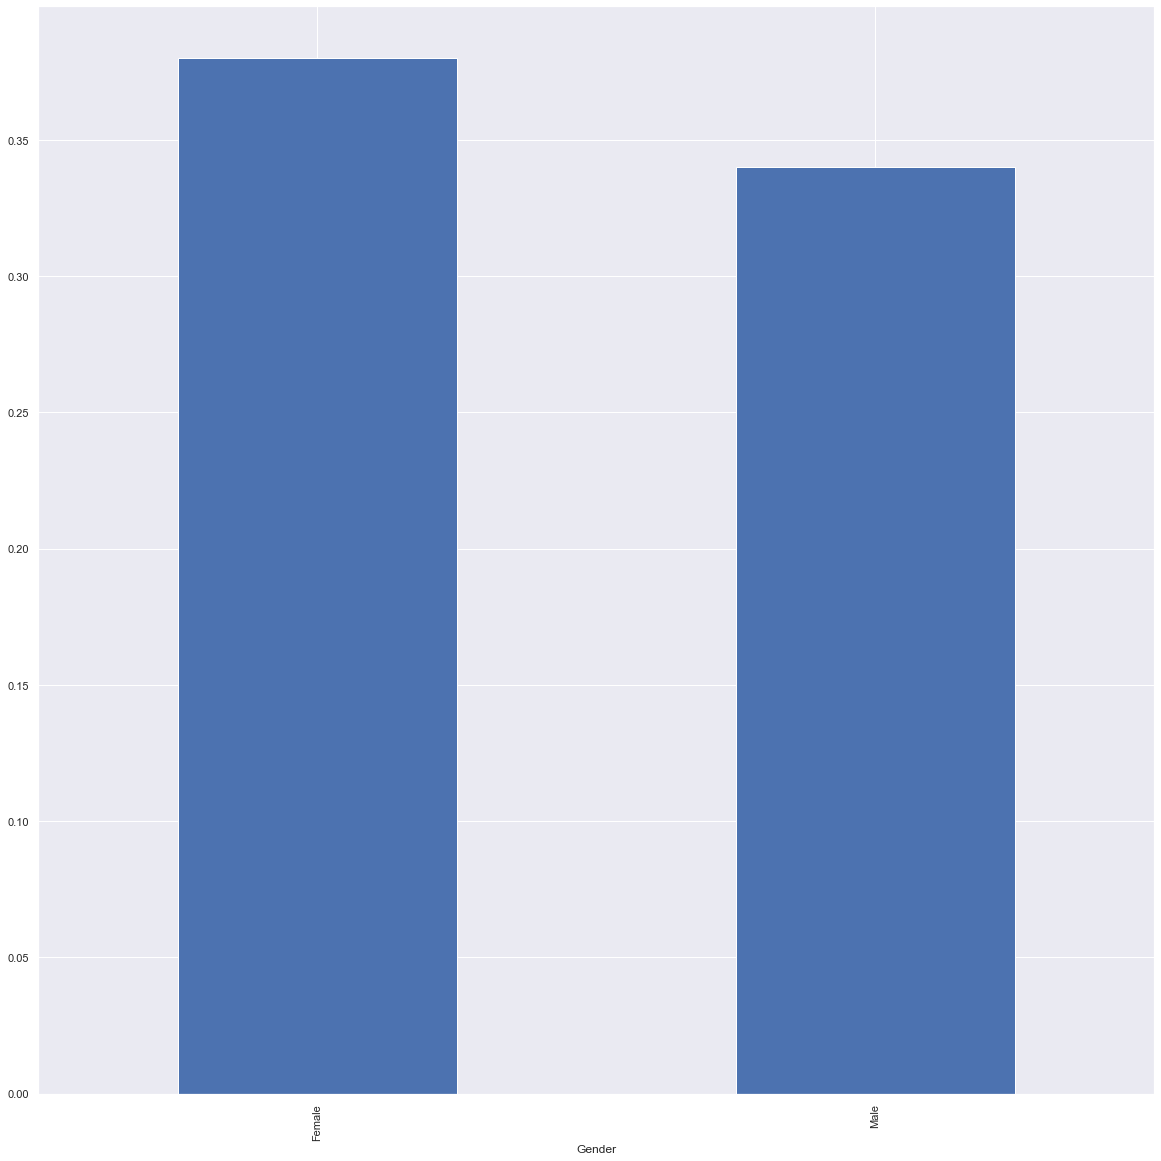

In [178]:
round(df.groupby("Gender")["Purchased"].mean(), 2).plot(kind = "bar")

<AxesSubplot:xlabel='Purchased'>

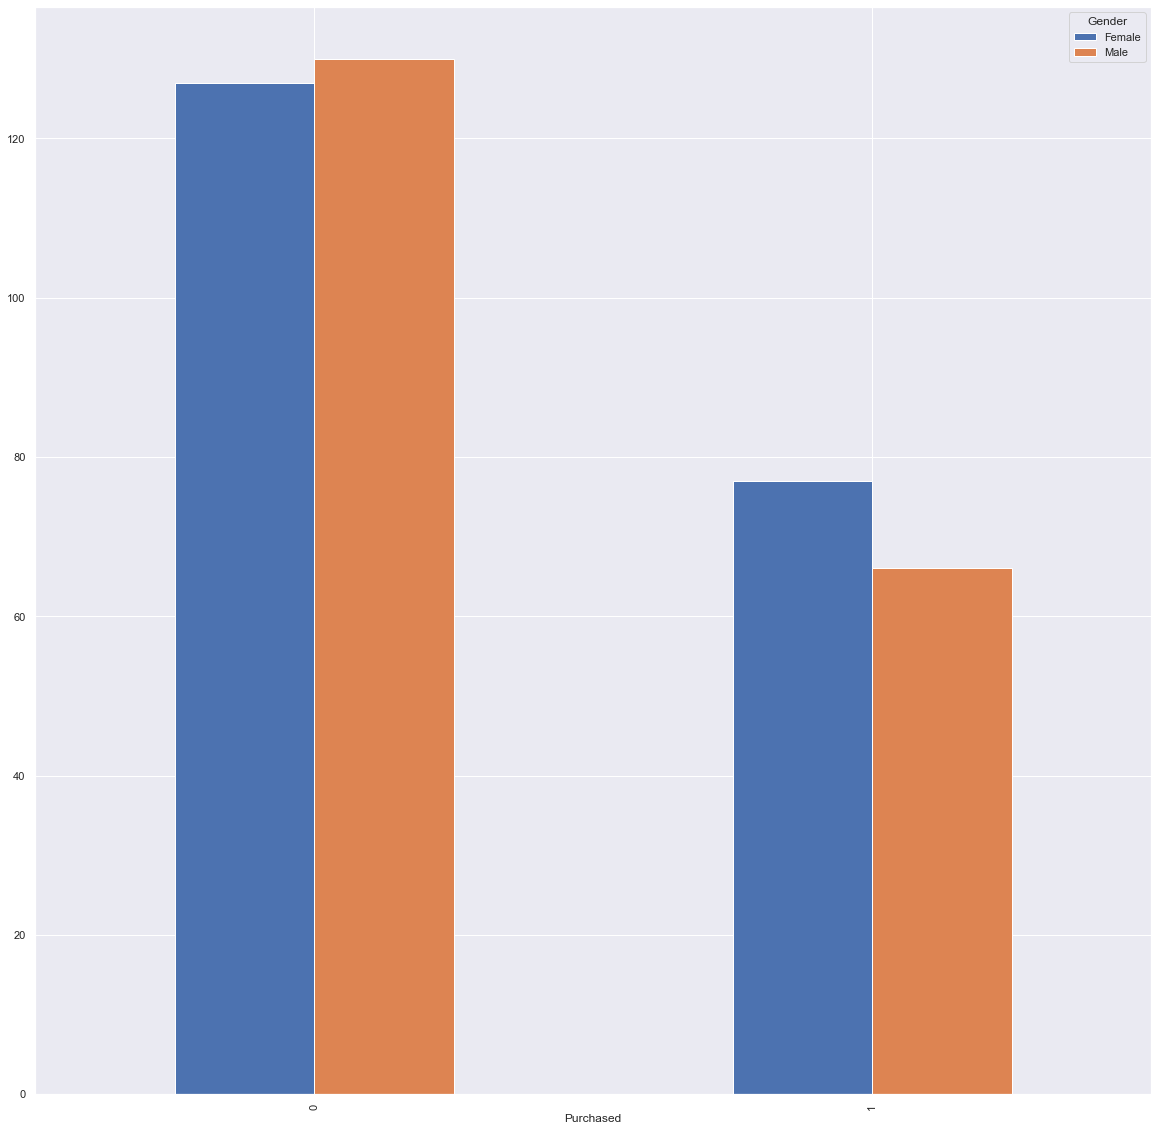

In [173]:
pd.crosstab(df.Purchased,df.Gender).plot(kind='bar')

<AxesSubplot:xlabel='Purchased'>

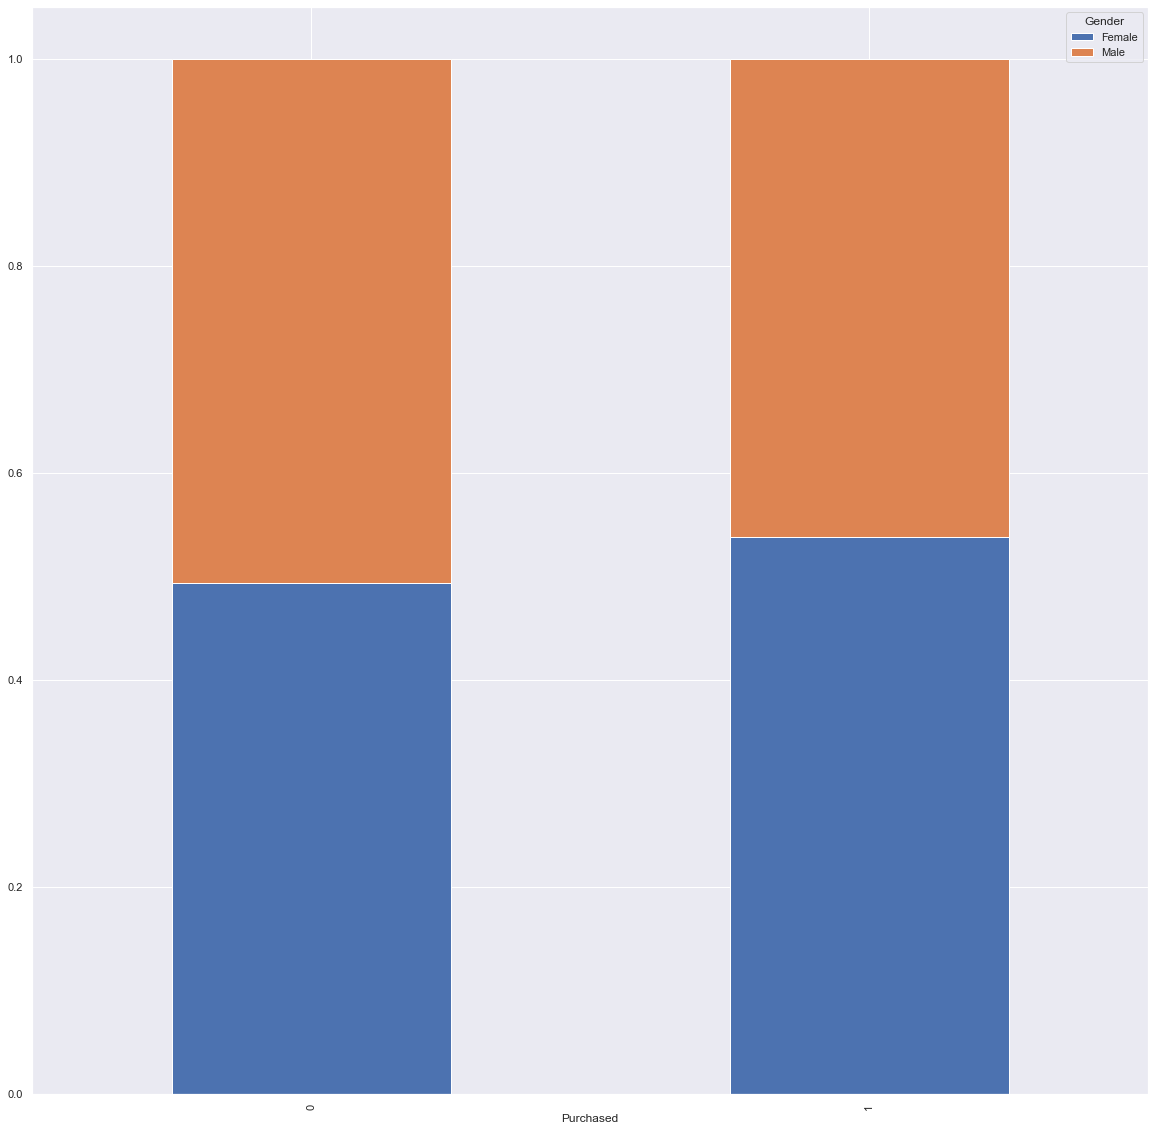

In [176]:
table = pd.crosstab(df.Purchased,df.Gender)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)